# Analysis of Titanic data.                                                                        

### Purpose:
Analysing the data to understand the factors that affected the survival rate of people on the titanic.

### Process overview:
The Titanic data was first imported into a pandas dataframe. Minor changes to the original dataframe were made that would later support the exploration phase before the data was explored in ways where the survival rate was considered as the dependent variable with independent variables being the different groups of people on the titanic. 

The groups were based on either gender, class of travel or age group. Speculations were made about the reasons for the observed survival rates and data was further explored for justifications.  

By analysing the descriptive statistics of the survival rate of various groups of people on the Titanic, provisional statements about the characteristics of likely survivors is made, tentative justifications were provided by looking for correlations in the data before conclusions are drawn as to what factors influenced the survival rate of people onboard the Titanic. 

### Code:
The below code section of the report contains the stages of data exploration and data wrangling that was conducted to get insights into the titanic data with our purpose in mind.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline 

In [3]:
#importing data from csv into a pandas dataframe
titanic_df = pd.read_csv('titanic_data.csv')

In [4]:
#looking into the format of our data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#creating a new column to show age group (child, teen, adult or senior)
#to create age group data, 'Age' column entry with NaN values are dropped
#Age_group category definitions are as follows:
#    child: age 0 - age 12
#    teen: age 13 - age 19
#    adult: age 20 - age 59
#    senior: age 60 above (considering 120 as the maximum)

titanic_df['Age_group'] = pd.cut(titanic_df['Age'].dropna(), bins = [0,13,19,60,120], \
                                 labels = ['child', 'teen', 'adult', 'senior'])

#creating a new column called Survival_rate (values of 100 for suvivors and 0 for non survivors)
titanic_df['Survival_rate'] = titanic_df['Survived'] * 100

#function that returns the first letter of the cabin number as the cabin category (where more than one cabin 
#numbers exist, the first one is considered)
def cabin_category(cabins):
    splits = cabins.split()
    for i in splits:
        if len(i) > 1:
            return i[0]
            break
            
#creating a new column in titanic_df called Cabin_category (column definition can be understood by looking into
#cabin_category function description above.)
titanic_df['Cabin_category'] = titanic_df['Cabin'].dropna().apply(cabin_category) 

#creating a new column in titanic_df called Fare_group that divides passengers into Fare groups 1,2 and 3 of 
# Fares between 0-200, 200-400 and 400-600
titanic_df['Fare_group'] = pd.cut(titanic_df['Fare'], bins = [0, 200, 400, 600], \
                                 labels = ['1', '2', '3'])

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Survival_rate,Cabin_category,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,adult,0,NaN,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,100,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,100,NaN,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,100,C,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,0,NaN,1


In [6]:
#FUNCTIONS
    
#function that returns the percentage of people survived in a group
def percent_survived(df):
    return df['Survival_rate'].mean()
    
#function that returns the percent of females in each group
def percent_females(df):
    return df.groupby('Sex').get_group('female')['PassengerId'].count() * 100 / df['PassengerId'].count()

# function that groups titanic_df dataframe by keywords, and returns the mean survival rate of each group and plots 
# it into a bar graph for ease of perception.
def describe_titanic_data_by(keywords):
    grouped_data = titanic_df.groupby(keywords)
    x = 'Mean survival rate in each group of {}\n'.format(keywords)
    print x
    print grouped_data['Survival_rate'].mean()
    plot = grouped_data['Survival_rate'].mean().plot(legend = True, kind = 'bar', title = x)
    plot.set(ylabel = 'Survival rate')
    plt.show()

    

    

### Descriptive statistics:

#### 1.
Titanic data is grouped according to various variables like gender, class and age group and their survival rates are plotted for analysis.

Mean survival rate in each group of Sex

Sex
female    74.203822
male      18.890815
Name: Survival_rate, dtype: float64


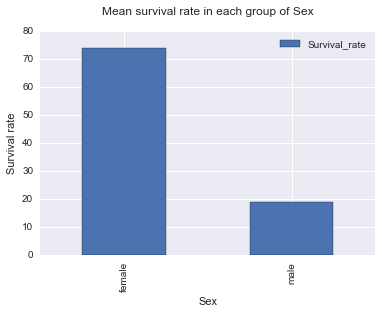

In [7]:
describe_titanic_data_by('Sex')

This shows that females survived the Titanic tragedy better than the males.

Mean survival rate in each group of Age_group

Age_group
child     59.154930
teen      39.784946
adult     39.015152
senior    22.727273
Name: Survival_rate, dtype: float64


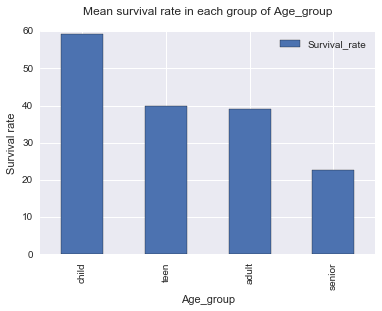

In [8]:
describe_titanic_data_by('Age_group')

This says that the children onboard Titanic who were of ages less than 13 survived its sinking better than the other age groups.

Mean survival rate in each group of Pclass

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survival_rate, dtype: float64


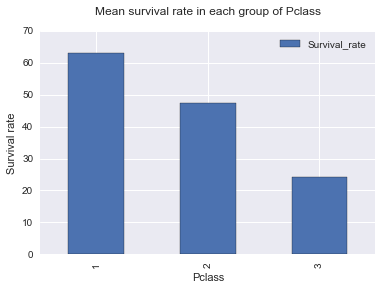

In [9]:
describe_titanic_data_by('Pclass')

We can say from the above plot that the first class travellers survived better than the second class travellers who inturn survived better than the third class travellers onboard Titanic during its sinking.

#### Highlights:
Our data highlights that females had a better survival rate than males, and also that children survived better than the other age groups. This is not very surprising due to the fact that it is usually morally right to prioritize lives of women and children in a situation like the Titanic sinking. The higher survival rates of women and children onboard the Titanic were thus maybe due to them being put on life boats more than the their counterpart groups. 


#### 2.
The difference in survival rates between different classes of people is interesting and requires more investigation to try to understand the reasons behind different survival rates of different classes. The difference in survival rates can be due to any number of reasons. Some of the interesting questions that can be answered with the data we have are as follows, 

    -Since we have data that says women survived better than males, could the difference in amount of women
     have affected the survival rates between each classes? 
    -Were wealthy people put on life boats first?
    -Did the cabin categories have any influence on survival rates?

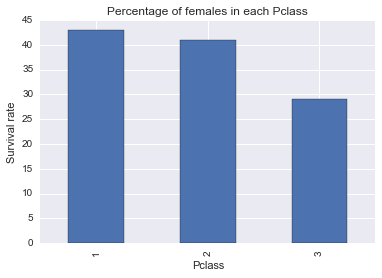

In [10]:
#plotting percentage of females in each class
plot = titanic_df.groupby('Pclass').apply(percent_females).plot(kind = 'bar', title = 'Percentage of females in each Pclass')
plot.set(ylabel = 'Survival rate')
plt.show()


This shows that percentage of females were more in first class than in second class than in third class. This graph correlates to the Mean survival rate in each group of Pclass graph. 

Fare_groups:

1: Fare of 0 to 200

2: Fare of 200 to 400

3: Fare of 400 to 600



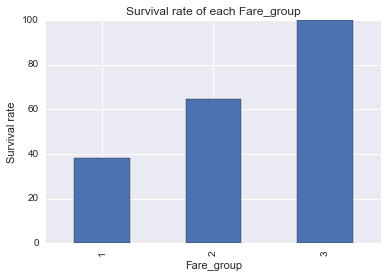

In [11]:
#survival rate of each Fare_group
print 'Fare_groups:\n'
print '1: Fare of 0 to 200\n'
print '2: Fare of 200 to 400\n'
print '3: Fare of 400 to 600\n'
plot = titanic_df.groupby('Fare_group').apply(percent_survived).plot(kind = 'bar', title = 'Survival rate of each Fare_group')
plot.set(ylabel = 'Survival rate')
plt.show()

This plot says that the people who paid more to travel on the Titanic survived its sinking better. If we can define wealth as the ability to buy a higher priced Titanic ticket, we can say that wealthy had a higher survival rates onboard the Titanic.

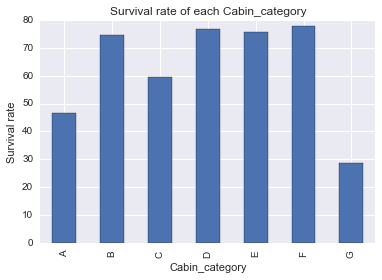

In [12]:
plot = titanic_df.groupby('Cabin_category').apply(percent_survived).plot(kind = 'bar', title = 'Survival rate of each Cabin_category')
plot.set(ylabel = 'Survival rate')
plt.show()

This shows that the survival rates of cabin categories B, D, E and F are fairly high compared to other categories, it can also be seen that the G category cabins have the least survival rate. 

We now look into the share of cabin categories in each of our 1st, 2nd and 3rd class groups to see if there's any correlation between the percentage of each cabin categories in each class and the difference in survival rates between each class.

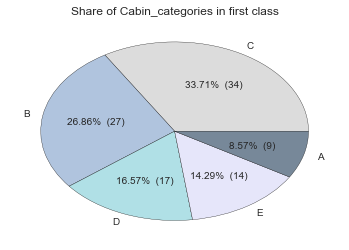

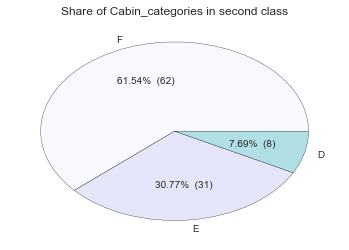

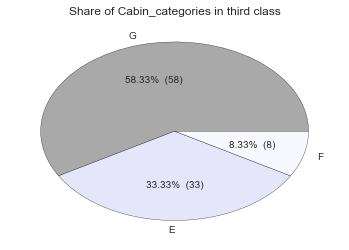

In [84]:
#grouping passengers by class
passengers_by_class = titanic_df.groupby('Pclass')

#function that returs the percentage share of cabin categories in ech group of class
def percent_cabins(grouped_data, group):
    series = grouped_data.get_group(group)['Cabin_category'].dropna().value_counts()
    return series * 100 / series.sum()

#function for modifying the pie charts to include percentage and count
def make_autopct(values):
  def my_autopct(pct):
      total = sum(values)
      val = int(round(pct*total/100.0))
      return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
  return my_autopct

df = percent_cabins(passengers_by_class, 1)
labels = ['C', 'B', 'D', 'E', 'A']
colors = ['gainsboro', 'lightsteelblue', 'powderblue', 'lavender', 'lightslategrey']
plt.pie(df, colors = colors, labels = labels, autopct = make_autopct(df) )
plt.title('Share of Cabin_categories in first class')
plt.show()

df = percent_cabins(passengers_by_class, 2)
labels = ['F', 'E', 'D']
colors = ['ghostwhite', 'lavender', 'powderblue', 'lightsteelblue', 'lightslategrey']
plt.pie(df, colors = colors, labels = labels, autopct = make_autopct(df) )
plt.title('Share of Cabin_categories in second class')
plt.show()

df = percent_cabins(passengers_by_class, 3)
labels = ['G', 'E', 'F']
colors = ['darkgrey', 'lavender', 'ghostwhite', 'powderblue', 'lightslategrey']
plt.pie(df, colors = colors, labels = labels, autopct = make_autopct(df) )
plt.title('Share of Cabin_categories in third class')
plt.show()



The above pie for the 3rd class says that the majority of them were in cabin category G, this cabin category also has the lowest survival rate as we have already seen. This may be the reason for low survival rate of the 3rd class people.

However if we look at the pie chart for 1st and 2nd class, much cannot be told about the difference in survival rates witnessed. It infact implies that the second class would have survived better than the first class. This contradiction and ambiguity in our pie charts are maybe due to the missing information about some cabin numbers in our dataset.

So, it is better to drop our arguement that there is a relationship between survival rates of different classes and share of cabin categories in each class.

#### Highlights:
The data we have shows correlation between the percentage of women in each class and the survival rates of each class. Also, the survival rate of wealthy were higher. 

Hence, we can only tentatively say from the data we have and the correlations we found that the first class survived better than the second class who survived better than third class due to the following reasons,

    -Percentage of females were more in first class than in second class than in third class. And that females
     survived better than males.
    -People were more wealthy in first class than in second class than in third class. And that wealthy 
     survived better.

### Conclusion:

The Titanic hosted 2224 passengers out of which more than 1500 died when it sank. By analysing the data of 891 passengers we had, we initially found that female survival rates were more than the male survival rates. The argument to this statistics can be that the female lives were prioritized over male lives. This can only be justified morally. The same argument about age group suggests that children lives would have been upheld during this situation. It infact is observed that this holds true about our data set, that children had higher survival rates than the rest. Our data also reveals that first class passengers' survival rates were higher than the rest. It was also found that first class contained higher percentage of women. Also, the wealthy seemed to have a higher survial rate maybe because of them being put on life boats first. These correlations can tentatively justify for the fact that first class passengers onboard the Titanic had higher survival rates. 

These statements about the survival rates and the factors that influenced them are obtained through analysis of our 891 datapoints out of the 2224 population data points. Without any details about the sampling method involved, it is assumed that these 891 data points have been drawn randmly from the population throughout our analysis. 